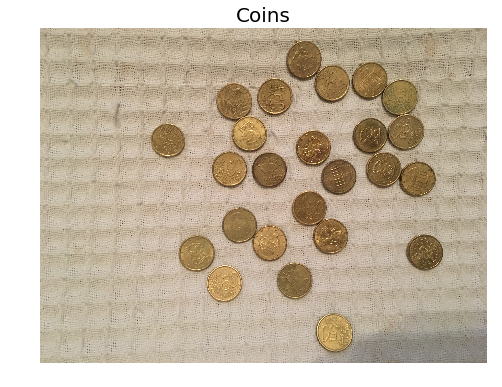

In [1]:
#Take Home Assignment
#Zoë Tromp
#Student ID: 2043033
#Assignment 1.1
#load some packages 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, color
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
from skimage import feature
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from scipy import ndimage
from scipy import ndimage as ndi
from skimage.morphology import dilation, erosion, disk, square, opening, closing, reconstruction, extrema, binary_closing, watershed
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h
from skimage.filters import rank, threshold_otsu
from skimage import util
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import scipy.ndimage.filters
from skimage.transform import resize
from skimage.feature import peak_local_max
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import skeletonize, thin
from skimage.morphology import medial_axis
%matplotlib inline

im = io.imread("2043033/COINS_4202.JPG") # read image from disk, provide the correct path  
plt.figure(figsize=(8,8)) #create a new figure of where the width = 800 pixels and height = 800 pixels or less
plt.imshow(im) # To display an image loaded with matplotlib-image library within the notebook
plt.axis('off') #turns the axis off 
plt.title('Coins',fontsize=20)  #add a title to the image 

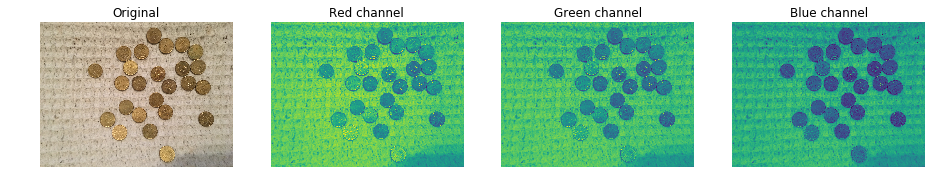

In [2]:
#Assignment 1.2
im = io.imread("2043033/COINS_4202.JPG") # read image from disk, provide the correct path  

plt.figure(figsize=(20,20))
plt.subplot(5,5,1), plt.imshow(im), plt.axis('off'), plt.title('Original')
plt.subplot(5,5,2), plt.imshow(im[:,:,0]), plt.axis('off'), plt.title('Red channel')
plt.subplot(5,5,3), plt.imshow(im[:,:,1]), plt.axis('off'), plt.title('Green channel')
plt.subplot(5,5,4), plt.imshow(im[:,:,2]), plt.axis('off'), plt.title('Blue channel')

blue_channel_image = im [:,:,2]
#plt.subplot(5,5,5), plt.imshow(blue_channel_image), plt.axis('off'), plt.title('Blue channel as image')

/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[19 19 19 19 19 17 19 19 17 19 19 19 19 17 17 17 17 19 17 17 17 17 19 19 19
 17 17 19 19 17 17 17 17 17 17 19 17 15 19 19 19 19 17 17 19]


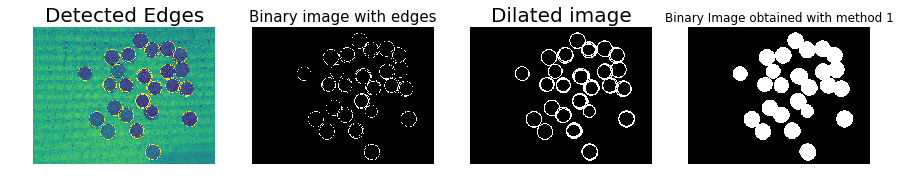

In [3]:
#Assignment 1.3 (method 1)
#circle detection with Hough transform

#resizing the image
image_resized = resize(blue_channel_image, (blue_channel_image.shape[0] // 9, blue_channel_image.shape[1] // 9))
#canny edge detection
edges = feature.canny(image_resized, sigma=1, low_threshold=0.1, high_threshold=0.5)

# Detect two radii
hough_radii = np.arange(15, 20, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 25 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=45)

image_resized_binary = np.zeros(image_resized.shape) #create an array of zeros and assign image_resized

# Draw them
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image_resized.shape)
    image_resized[circy, circx] = 1
    image_resized_binary[circy, circx] = 1


h_trans_dila = dilation(image_resized_binary, disk(1))
h_trans_dila_fil = binary_fill_holes(h_trans_dila, disk(1))
plt.figure(figsize=(15,15))
plt.subplot(441), plt.imshow(image_resized), plt.axis('off'), plt.title('Detected Edges', fontsize=20)
plt.subplot(442), plt.imshow(image_resized_binary, cmap=plt.cm.gray), plt.axis('off'), plt.title('Binary image with edges', fontsize=15)
plt.subplot(443), plt.imshow(h_trans_dila, cmap=plt.cm.gray), plt.axis('off'), plt.title('Dilated image', fontsize=20)
plt.subplot(444), plt.imshow(h_trans_dila_fil, cmap=plt.cm.gray), plt.axis('off'), plt.title('Binary Image obtained with method 1', fontsize=12)

print(radii)



(<matplotlib.axes._subplots.AxesSubplot at 0x10474e7f0>,
 (-0.5, 4031.5, 3023.5, -0.5),
 <matplotlib.text.Text at 0x1193f0cf8>)

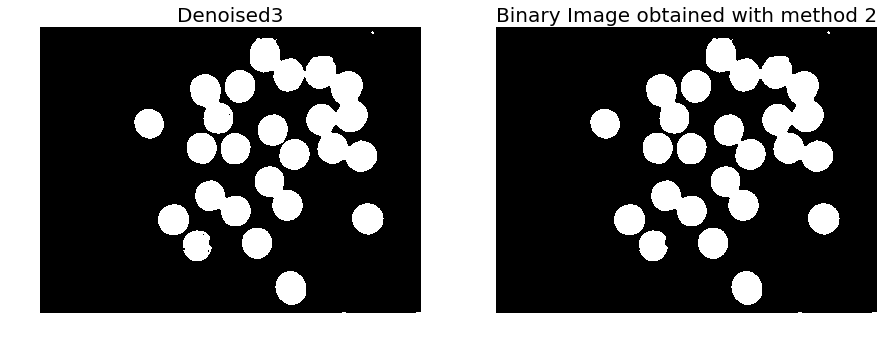

In [4]:
#Assignment 1.3 (method 2: Otsu thresholding) 
blue_channel_image = (blue_channel_image - blue_channel_image.min())/(blue_channel_image.max() - blue_channel_image.min())
#Otsu tresholding method
global_thresh = threshold_otsu(blue_channel_image)
binary_global = blue_channel_image < global_thresh

denoised = rank.median(binary_global, disk(15))
denoised2 = rank.median(denoised, disk(15))
denoised3 = rank.median(denoised2, disk(15))
close3 = closing(denoised3, disk(15))



plt.figure(figsize = (15,15))
plt.subplot(221), plt.imshow(denoised3,cmap='gray'), plt.axis('off'), plt.title('Denoised3', fontsize=20)
plt.subplot(222), plt.imshow(close3,cmap='gray'), plt.axis('off'), plt.title('Binary Image obtained with method 2', fontsize=20)


578
715740
88641
173643
76974
167507
83638
83153
163415
163259
85886
85052
83468
77978
91871
462
515


(<matplotlib.axes._subplots.AxesSubplot at 0x11a8d99b0>,
 (-0.5, 4031.5, 3023.5, -0.5),
 <matplotlib.text.Text at 0x11b0ee6d8>)

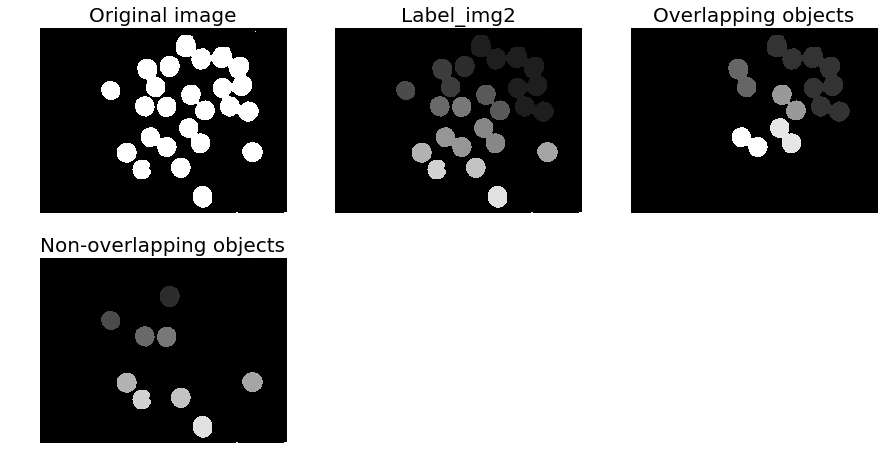

In [5]:
#Assignment 1.4
label_img2 = ndi.label(close3)[0]

for region in regionprops(label_img2):
    print(region.area) 

from skimage.morphology import remove_small_objects

overlapping = remove_small_objects(label_img2, 92200, connectivity=1)
non_overlapping = label_img2 - overlapping

plt.figure(figsize = (15,12))
plt.subplot(331), plt.imshow(close3, cmap=plt.cm.gray), plt.axis('off'), plt.title('Original image', fontsize=20)
plt.subplot(332), plt.imshow(label_img2, cmap=plt.cm.gray), plt.axis('off'), plt.title('Label_img2', fontsize=20)
plt.subplot(333), plt.imshow(overlapping, cmap=plt.cm.gray), plt.axis('off'), plt.title('Overlapping objects', fontsize=20)
plt.subplot(334), plt.imshow(non_overlapping, cmap=plt.cm.gray), plt.axis('off'), plt.title('Non-overlapping objects', fontsize=20)


(<matplotlib.axes._subplots.AxesSubplot at 0x119081ba8>,
 (-0.5, 4031.5, 3023.5, -0.5),
 <matplotlib.text.Text at 0x1225d6c18>)

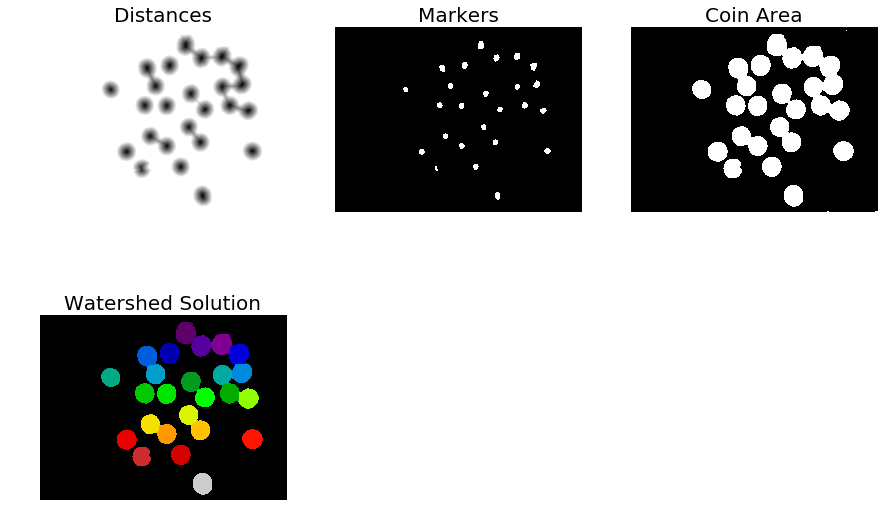

In [6]:
#Assignment 1.5 (waterhed with distance transform)
distance = ndimage.distance_transform_edt(close3)
#Markers are created by taking local maxima of the distance to the background
local_maxi = distance > 0.7*distance.max() 
label_img = ndi.label(local_maxi)[0]

# We input the following parameters to the watershed function 
# (1) The complement of the distance (-distance)  
# (2) An array marking the coins with the values to be assigned in the label matrix.
# (3) Array of same shape as image. Only points at which mask == True will be labeled 
watershed_labels = watershed(-distance, label_img, mask=close3)

plt.figure(figsize=(15,15))
plt.subplot(331), plt.imshow(-distance, cmap='gray'), plt.axis('off'), plt.title('Distances', fontsize=20)
plt.subplot(332), plt.imshow(local_maxi, cmap='gray'), plt.axis('off'), plt.title('Markers', fontsize=20)
plt.subplot(333), plt.imshow(close3, cmap='gray'), plt.axis('off'), plt.title('Coin Area', fontsize=20)   
plt.subplot(334), plt.imshow(watershed_labels, cmap=plt.cm.spectral), plt.axis('off'), plt.title('Watershed Solution', fontsize=20) 



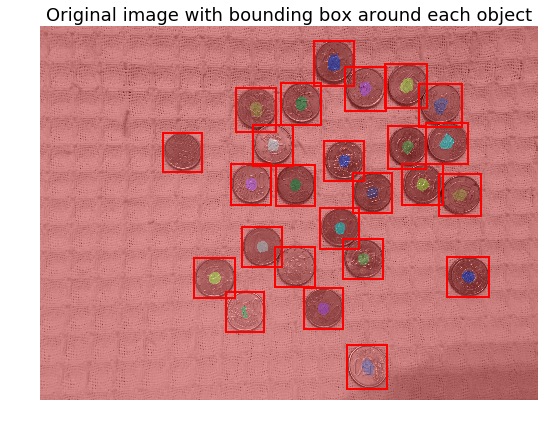

25

In [7]:
#Assignment 1.6
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects
from skimage.color import label2rgb
from skimage import filters
import math
import matplotlib.patches as mpatches

number_coins_found = [] #create a list to count the number of coins that i found

#overlay the markers to the original image 
image_label_overlay = label2rgb(label_img, image=im)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(watershed_labels):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        number_coins_found.append(rect)
    
ax.set_axis_off()
plt.title('Original image with bounding box around each object', fontsize=18)
plt.tight_layout()
plt.show()
len(number_coins_found) #returns the number of coins that are found





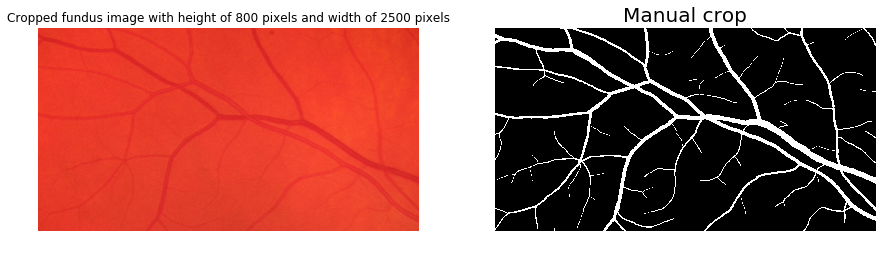

In [8]:
#Assignment 2.1.1
from PIL import Image 
from numpy import array
  
# Opens an image in RGB mode 
im = Image.open("2043033/img_15_g.jpg")
manual2 = Image.open("2043033/manual_15_g.tif")   
im1 = im.crop((1001,1,2500,800)) 
manual_crop = manual2.crop((1001,1,2500,800))
  
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im1), plt.axis('off'), plt.title('Cropped fundus image with height of 800 pixels and width of 2500 pixels') 
plt.subplot(222), plt.imshow(manual_crop, cmap=plt.cm.gray), plt.axis('off'), plt.title('Manual crop', fontsize=20) 
im1.save('2043033/imgcropped_15_g.png')
manual_crop.save('2043033/manualcropped_15_g.tif')

/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


0.88792528352234823

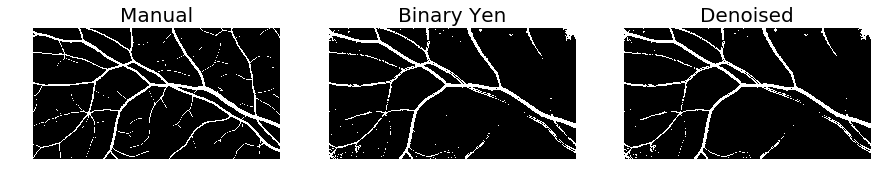

In [9]:
#Assignment 2.1.2

#from skimage.filters import try_all_threshold
#fig, ax = try_all_threshold(crop2, figsize=(10, 8), verbose=False)
#plt.show()

from sklearn.metrics import jaccard_similarity_score
from skimage.filters import threshold_yen
cropped = img_as_ubyte(rgb2gray(io.imread('2043033/imgcropped_15_g.png')))
manual = img_as_ubyte(rgb2gray(io.imread('2043033/manualcropped_15_g.tif')))
crop = np.asarray(cropped)
crop2 = crop.astype(float)

thresh_yen = threshold_yen(crop2)
binary_yen = crop2 <= thresh_yen
denoised8 = rank.median(binary_yen, disk(1))

j = jaccard_similarity_score(manual[0], binary_yen[0])
j2 = jaccard_similarity_score(manual[0], denoised8[0])

plt.figure(figsize=(15,15))
plt.subplot(331), plt.imshow(manual, cmap=plt.cm.gray), plt.axis('off'), plt.title('Manual', fontsize=20)
plt.subplot(332), plt.imshow(binary_yen, cmap=plt.cm.gray), plt.axis('off'), plt.title('Binary Yen', fontsize=20)
plt.subplot(333), plt.imshow(denoised8, cmap=plt.cm.gray), plt.axis('off'), plt.title('Denoised', fontsize=20)

j2



(<matplotlib.axes._subplots.AxesSubplot at 0x11d665358>,
 (-0.5, 1498.5, 798.5, -0.5),
 <matplotlib.text.Text at 0x11929bcc0>)

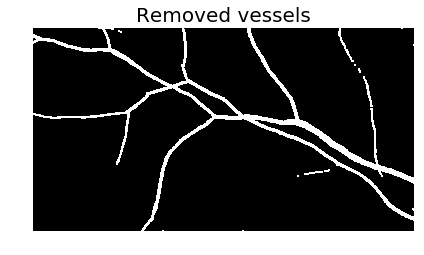

In [10]:
#Assignment 2.2.1
removed_vessels = opening(manual, square(8))
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(removed_vessels, cmap=plt.cm.gray), plt.axis('off'), plt.title('Removed vessels', fontsize=20)

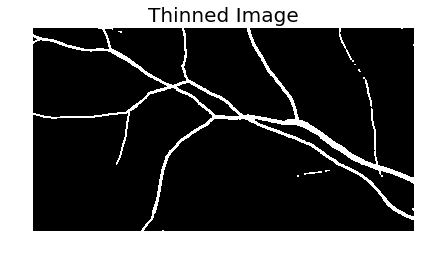

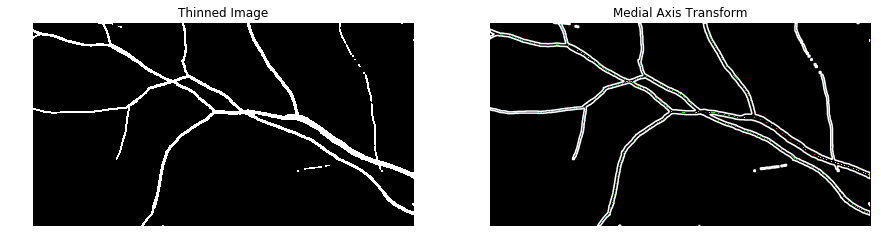

799


In [26]:
#Assignment 2.2.2
thinned_partial = thin(removed_vessels, max_iter=1)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(thinned_partial, cmap=plt.cm.gray), plt.axis('off'), plt.title('Thinned Image', fontsize=20)




skel, distance = medial_axis(thinned_partial, return_distance=True)
dist_on_skel = distance * skel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(thinned_partial, cmap=plt.cm.gray, interpolation='nearest') 
ax1.axis('off')
ax1.title.set_text('Thinned Image')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(thinned_partial, [0.5], colors='w')
ax2.axis('off')
ax2.title.set_text('Medial Axis Transform')
plt.show()

print(len(skel))


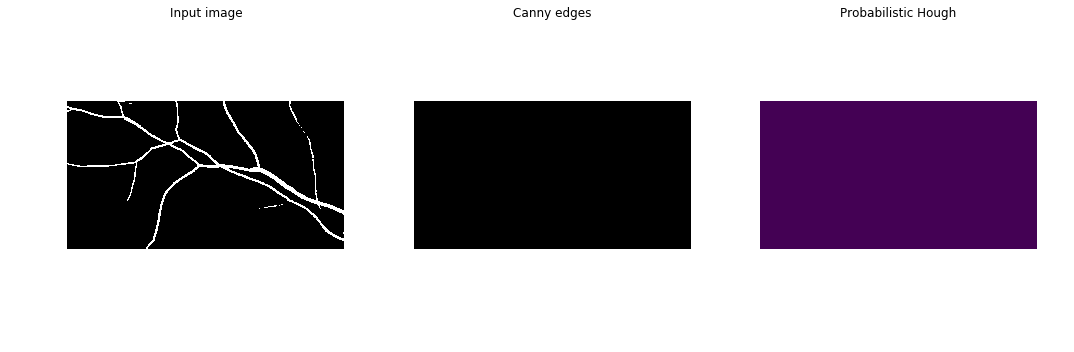

(20,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


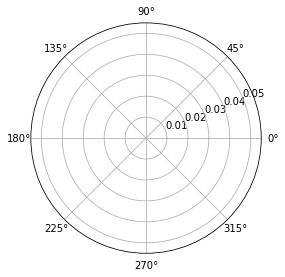

In [35]:
#Assignment 2.2.3
edges = feature.canny(thinned_partial, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=5)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(thinned_partial, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, thinned_partial.shape[1]))
ax[2].set_ylim((thinned_partial.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

# display the number of lines at each range of angles in a poloar (rose) plot 
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
N = 20
radii = np.histogram(lines,bins=N)
atheta = np.arange(-np.pi/2, np.pi/2, np.pi/N)
print(atheta.shape)
print(radii[0])

width = np.pi/N
bars = plt.bar(atheta+np.pi/(2*N), radii[0], width=width, bottom=0.0)
